# MNIST CNN Assignment - ERA V4 Session 6

## Assignment Objectives
- **Target Accuracy**: ≥99.4% (consistently in last few epochs)
- **Max Epochs**: ≤15
- **Max Parameters**: <8000
- **Data Split**: Standard MNIST (60K train + 10K test)
- **Architecture**: Modular CNN models (Model_1, Model_2, Model_3)

## Strategy
This notebook trains three CNN models with progressive improvements using standard MNIST data split:
1. **Model_1**: Baseline lightweight CNN
2. **Model_2**: Enhanced with Batch Normalization and Dropout  
3. **Model_3**: Optimized architecture with strategic parameter management

**Data Strategy**: Using standard MNIST train (60K) and test (10K) split for proper evaluation and comparison with established benchmarks.

Each model includes target-result-analysis documentation and detailed performance tracking.

In [1]:
!rm *.py

In [2]:
# Upload Python files to Colab
from google.colab import files
import os

print("Please upload these files:")
print("- model1.py")
print("- model2.py")
print("- model3.py")
print("- train.py")
print("- utils.py")

# Upload files
uploaded = files.upload()

# Process uploaded files - replace any existing files
print("\n🔄 Processing uploaded files...")
for filename in uploaded.keys():
    # Write the uploaded content to file (this replaces existing files)
    with open(filename, 'wb') as f:
        f.write(uploaded[filename])
    print(f"  ✅ {filename} uploaded and saved ({len(uploaded[filename])} bytes)")

# Verify all required files are present
required_files = ['model1.py', 'model2.py', 'model3.py', 'train.py', 'utils.py']
missing_files = []

print("\n📋 Verification:")
for file in required_files:
    if os.path.exists(file):
        file_size = os.path.getsize(file)
        print(f"  ✅ {file} - {file_size} bytes")
    else:
        missing_files.append(file)
        print(f"  ❌ {file} - MISSING")

if missing_files:
    print(f"\n⚠️  Missing files: {missing_files}")
    print("Please upload the missing files and run this cell again.")
else:
    print(f"\n🎉 All {len(required_files)} files uploaded successfully!")
    print("Ready to proceed with training.")

Please upload these files:
- model1.py
- model2.py
- model3.py
- train.py
- utils.py


Saving model2.py to model2.py
Saving train.py to train.py
Saving utils.py to utils.py
Saving model3.py to model3.py
Saving model1.py to model1.py

🔄 Processing uploaded files...
  ✅ model2.py uploaded and saved (4605 bytes)
  ✅ train.py uploaded and saved (9941 bytes)
  ✅ utils.py uploaded and saved (9430 bytes)
  ✅ model3.py uploaded and saved (5310 bytes)
  ✅ model1.py uploaded and saved (3424 bytes)

📋 Verification:
  ✅ model1.py - 3424 bytes
  ✅ model2.py - 4605 bytes
  ✅ model3.py - 5310 bytes
  ✅ train.py - 9941 bytes
  ✅ utils.py - 9430 bytes

🎉 All 5 files uploaded successfully!
Ready to proceed with training.


## Section 1: Setup and Configuration

In [3]:
# Install required packages
!pip install torch torchvision matplotlib seaborn tqdm -q

# Import necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import io
import sys
import time
from contextlib import redirect_stdout, redirect_stderr
from tqdm import tqdm

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
if device.type == 'cuda':
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

Using device: cuda
GPU: Tesla T4
Memory: 14.7 GB


In [4]:
# Upload model files to Colab
# NOTE: Upload model1.py, model2.py, model3.py, train.py, and utils.py files to this Colab session

# Verify uploaded files
import os
required_files = ['model1.py', 'model2.py', 'model3.py', 'train.py', 'utils.py']
missing_files = []

for file in required_files:
    if not os.path.exists(file):
        missing_files.append(file)

if missing_files:
    print("❌ Missing files:", missing_files)
    print("Please upload the following files to Colab:")
    for file in missing_files:
        print(f"  - {file}")
else:
    print("✅ All required files are present!")

# List all .py files in current directory
print("\nPython files in current directory:")
py_files = [f for f in os.listdir('.') if f.endswith('.py')]
for file in py_files:
    print(f"  - {file}")

✅ All required files are present!

Python files in current directory:
  - model3.py
  - train.py
  - model2.py
  - model1.py
  - utils.py


## Section 2: Model Analysis and Comparison

In [5]:
# Import model classes
from model1 import Model_1
from model2 import Model_2
from model3 import Model_3
from utils import count_parameters, calculate_receptive_field, print_model_summary

# Create model instances
models = {
    'Model_1': Model_1(),
    'Model_2': Model_2(),
    'Model_3': Model_3()
}

# Analyze each model
print("="*80)
print("MODEL ANALYSIS AND COMPARISON")
print("="*80)

model_stats = {}
for name, model in models.items():
    print(f"\n{'-'*60}")
    param_count = print_model_summary(model, name)
    model_stats[name] = {
        'parameters': param_count,
        'under_8000': param_count < 8000
    }

# Create comparison table
print(f"\n{'='*60}")
print("PARAMETER COMPARISON")
print(f"{'='*60}")
print(f"{'Model':<10} {'Parameters':<12} {'Under 8000':<12} {'Status'}")
print("-" * 50)

for name, stats in model_stats.items():
    status = "✅ PASS" if stats['under_8000'] else "❌ FAIL"
    print(f"{name:<10} {stats['parameters']:<12} {stats['under_8000']:<12} {status}")

print(f"\nTotal models under 8000 parameters: {sum(1 for stats in model_stats.values() if stats['under_8000'])}/3")

MODEL ANALYSIS AND COMPARISON

------------------------------------------------------------

Model_1 Summary:
Parameters: 5976
Under 8000 limit: ✅
Receptive Field: 20x20
Description: Progressive baseline: 6-layer CNN (no regularization)
Expected Parameters: 5976
Parameter Match: ✅

Architecture:
  conv1: Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), bias=False)
  conv2: Conv2d(16, 18, kernel_size=(3, 3), stride=(1, 1), bias=False)
  conv3: Conv2d(18, 10, kernel_size=(1, 1), stride=(1, 1), bias=False)
  pool1: MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  conv4: Conv2d(10, 12, kernel_size=(3, 3), stride=(1, 1), bias=False)
  pool2: MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  conv5: Conv2d(12, 10, kernel_size=(3, 3), stride=(1, 1), bias=False)
  conv6: Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), bias=False)

------------------------------------------------------------

Model_2 Summary:
Parameters: 7808
Under 8000 li

RECEPTIVE FIELD ANALYSIS

Model_1 Receptive Field Calculation:
----------------------------------------
Layer                     Output Size  Receptive Field
-------------------------------------------------------
Input                     28           1
Conv1 (3x3, p=0)          26           3
Conv2 (3x3, p=0)          24           5
MaxPool (2x2)             12           6
Conv3 (1x1, p=0)          12           6
Conv4 (3x3, p=0)          10           10
MaxPool (2x2)             5            12
Conv5 (1x1, p=0)          5            12
Conv6 (3x3, p=0)          3            16
Direct Classification     1            20

🎯 Final Receptive Field: 20x20
✅ Good coverage for 28x28 MNIST images

Model_2 Receptive Field Calculation:
----------------------------------------
Layer                     Output Size  Receptive Field
-------------------------------------------------------
Input                     28           1
Conv1+BN (3x3, p=0)       26           3
Conv2+BN (3x3, p=0)       2

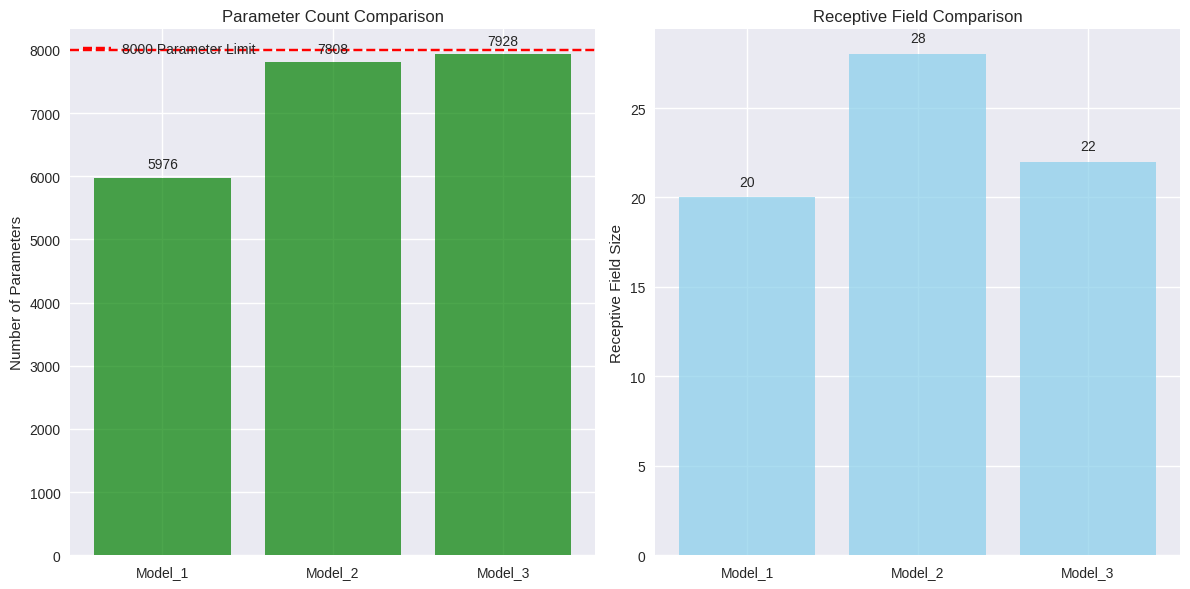

In [6]:
# Calculate and display receptive fields
print("="*80)
print("RECEPTIVE FIELD ANALYSIS")
print("="*80)

rf_data = calculate_receptive_field()

for model_name, rf_info in rf_data.items():
    print(f"\n{model_name} Receptive Field Calculation:")
    print("-" * 40)
    print(f"{'Layer':<25} {'Output Size':<12} {'Receptive Field'}")
    print("-" * 55)

    for layer_name, output_size, rf in rf_info['layers']:
        print(f"{layer_name:<25} {output_size:<12} {rf}")

    print(f"\n🎯 Final Receptive Field: {rf_info['final_rf']}x{rf_info['final_rf']}")

    # Analysis
    if rf_info['final_rf'] >= 17:
        print("✅ Good coverage for 28x28 MNIST images")
    else:
        print("⚠️  May need larger receptive field for complex patterns")

# Visualize parameter distribution
plt.figure(figsize=(12, 6))

# Parameter count comparison
plt.subplot(1, 2, 1)
model_names = list(model_stats.keys())
param_counts = [model_stats[name]['parameters'] for name in model_names]
colors = ['green' if count < 8000 else 'red' for count in param_counts]

bars = plt.bar(model_names, param_counts, color=colors, alpha=0.7)
plt.axhline(y=8000, color='red', linestyle='--', label='8000 Parameter Limit')
plt.title('Parameter Count Comparison')
plt.ylabel('Number of Parameters')
plt.legend()

# Add value labels on bars
for bar, count in zip(bars, param_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
             str(count), ha='center', va='bottom')

# Receptive field comparison
plt.subplot(1, 2, 2)
rf_values = [rf_data[name]['final_rf'] for name in model_names]
plt.bar(model_names, rf_values, color='skyblue', alpha=0.7)
plt.title('Receptive Field Comparison')
plt.ylabel('Receptive Field Size')

# Add value labels
for i, rf in enumerate(rf_values):
    plt.text(i, rf + 0.5, str(rf), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Section 3: Training Execution and Logging

In [7]:
# Import training functions
from train import train_model, count_parameters

# Function to capture training output and logs
def capture_training_with_logs(model_num):
    """Capture training output and return structured data"""
    print(f"\n{'='*80}")
    print(f"🚀 STARTING TRAINING FOR MODEL {model_num}")
    print(f"{'='*80}")

    # Capture stdout
    stdout_buffer = io.StringIO()

    start_time = time.time()

    with redirect_stdout(stdout_buffer):
        try:
            training_log, best_acc, epochs_above_994 = train_model(model_num, epochs=15)
        except Exception as e:
            print(f"❌ Training failed for Model {model_num}: {e}")
            return None, None, None, None

    end_time = time.time()
    total_time = end_time - start_time

    # Get captured output
    training_output = stdout_buffer.getvalue()

    # Also print to console for real-time monitoring
    print(training_output)

    return training_log, best_acc, epochs_above_994, training_output

# Initialize storage for all results
all_results = {}
all_training_logs = {}
all_outputs = {}

print("🎯 Assignment Targets:")
print("   • Accuracy: ≥99.4% (consistent in last epochs)")
print("   • Parameters: <8000")
print("   • Epochs: ≤15")
print("   • Models: 3 progressive improvements")

🎯 Assignment Targets:
   • Accuracy: ≥99.4% (consistent in last epochs)
   • Parameters: <8000
   • Epochs: ≤15
   • Models: 3 progressive improvements


In [8]:
# Train Model 1
print("Training Model 1 - Baseline CNN...")
training_log_1, best_acc_1, epochs_994_1, output_1 = capture_training_with_logs(1)

if training_log_1:
    all_results['Model_1'] = {
        'training_log': training_log_1,
        'best_accuracy': best_acc_1,
        'epochs_above_994': epochs_994_1,
        'parameters': model_stats['Model_1']['parameters']
    }
    all_training_logs['Model_1'] = training_log_1
    all_outputs['Model_1'] = output_1

    final_acc_1 = training_log_1[-1]['test_acc']
    print(f"\n📊 Model 1 Summary:")
    print(f"   • Final Accuracy: {final_acc_1:.2f}%")
    print(f"   • Best Accuracy: {best_acc_1*100:.2f}%")
    print(f"   • Parameters: {model_stats['Model_1']['parameters']}")
    print(f"   • Epochs ≥99.4%: {epochs_994_1}")
else:
    print("❌ Model 1 training failed!")

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch  1 Train:   0%|                                   | 0/469 [00:00<?, ?it/s]

Training Model 1 - Baseline CNN...

🚀 STARTING TRAINING FOR MODEL 1


Epoch 15 Test : 100%|████| 79/79 [00:02<00:00, 38.77it/s, Loss=0.905, Acc=61.5%]


Training Model 1 - Target: 99.4%
Using device: cuda
Data split: Standard MNIST (60K train, 10K test)
Model parameters: 5,976

Epoch | Train Loss | Train Acc | Test Loss | Test Acc | LR
-----------------------------------------------------------------
    1 |     1.6051 |     34.37% |    1.4137 |    40.41% | 0.027136
    2 |     1.4067 |     40.56% |    1.4025 |    40.68% | 0.019639
    3 |     1.3676 |     42.16% |    1.1940 |    50.36% | 0.010371
    4 |     1.1710 |     50.75% |    1.1649 |    50.89% | 0.002874
    5 |     1.1536 |     51.06% |    1.1572 |    51.03% | 0.030000
    6 |     1.1697 |     50.79% |    1.1661 |    50.86% | 0.029266
    7 |     0.9705 |     59.39% |    0.9219 |    61.10% | 0.027136
    8 |     0.9292 |     60.79% |    0.9257 |    61.22% | 0.023819
    9 |     0.9209 |     60.99% |    0.9198 |    61.23% | 0.019639
   10 |     0.9168 |     61.05% |    0.9125 |    61.39% | 0.015005
   11 |     0.9119 |     61.11% |    0.9156 |    61.48% | 0.010371
   12 |    

In [9]:
# Train Model 2
print("Training Model 2 - Enhanced with BatchNorm and Dropout...")
training_log_2, best_acc_2, epochs_994_2, output_2 = capture_training_with_logs(2)

if training_log_2:
    all_results['Model_2'] = {
        'training_log': training_log_2,
        'best_accuracy': best_acc_2,
        'epochs_above_994': epochs_994_2,
        'parameters': model_stats['Model_2']['parameters']
    }
    all_training_logs['Model_2'] = training_log_2
    all_outputs['Model_2'] = output_2

    final_acc_2 = training_log_2[-1]['test_acc']
    print(f"\n📊 Model 2 Summary:")
    print(f"   • Final Accuracy: {final_acc_2:.2f}%")
    print(f"   • Best Accuracy: {best_acc_2*100:.2f}%")
    print(f"   • Parameters: {model_stats['Model_2']['parameters']}")
    print(f"   • Epochs ≥99.4%: {epochs_994_2}")
else:
    print("❌ Model 2 training failed!")

Epoch  1 Train:   0%|                                   | 0/469 [00:00<?, ?it/s]

Training Model 2 - Enhanced with BatchNorm and Dropout...

🚀 STARTING TRAINING FOR MODEL 2


Epoch 15 Test : 100%|████| 79/79 [00:02<00:00, 37.92it/s, Loss=0.715, Acc=78.9%]


Training Model 2 - Target: 99.4%
Using device: cuda
Data split: Standard MNIST (60K train, 10K test)
Model parameters: 7,808

Epoch | Train Loss | Train Acc | Test Loss | Test Acc | LR
-----------------------------------------------------------------
    1 |     0.8253 |     75.20% |    0.7449 |    77.52% | 0.027136
    2 |     0.7375 |     78.25% |    0.7344 |    78.08% | 0.019639
    3 |     0.7259 |     78.71% |    0.7347 |    78.16% | 0.010371
    4 |     0.7189 |     78.88% |    0.7219 |    78.79% | 0.002874
    5 |     0.7126 |     79.11% |    0.7200 |    78.57% | 0.030000
    6 |     0.7270 |     78.59% |    0.7290 |    78.43% | 0.029266
    7 |     0.7243 |     78.64% |    0.7272 |    78.64% | 0.027136
    8 |     0.7209 |     78.85% |    0.7254 |    78.82% | 0.023819
    9 |     0.7172 |     78.90% |    0.7275 |    78.27% | 0.019639
   10 |     0.7163 |     78.92% |    0.7258 |    78.65% | 0.015005
   11 |     0.7115 |     79.09% |    0.7206 |    78.83% | 0.010371
   12 |    

In [10]:
# Train Model 3
print("Training Model 3 - Optimized Architecture...")
training_log_3, best_acc_3, epochs_994_3, output_3 = capture_training_with_logs(3)

if training_log_3:
    all_results['Model_3'] = {
        'training_log': training_log_3,
        'best_accuracy': best_acc_3,
        'epochs_above_994': epochs_994_3,
        'parameters': model_stats['Model_3']['parameters']
    }
    all_training_logs['Model_3'] = training_log_3
    all_outputs['Model_3'] = output_3

    final_acc_3 = training_log_3[-1]['test_acc']
    print(f"\n📊 Model 3 Summary:")
    print(f"   • Final Accuracy: {final_acc_3:.2f}%")
    print(f"   • Best Accuracy: {best_acc_3*100:.2f}%")
    print(f"   • Parameters: {model_stats['Model_3']['parameters']}")
    print(f"   • Epochs ≥99.4%: {epochs_994_3}")
else:
    print("❌ Model 3 training failed!")

print(f"\n{'='*80}")
print("🏁 ALL TRAINING COMPLETED!")
print(f"{'='*80}")

Epoch  1 Train:   0%|                                   | 0/469 [00:00<?, ?it/s]

Training Model 3 - Optimized Architecture...

🚀 STARTING TRAINING FOR MODEL 3


Epoch 15 Test : 100%|████| 79/79 [00:02<00:00, 39.22it/s, Loss=0.020, Acc=99.4%]


Training Model 3 - Target: 99.4%
Using device: cuda
Data split: Standard MNIST (60K train, 10K test)
Model parameters: 7,928

Epoch | Train Loss | Train Acc | Test Loss | Test Acc | LR
-----------------------------------------------------------------
    1 |     0.4309 |     85.20% |    0.0657 |    98.08% | 0.027136
    2 |     0.0551 |     98.42% |    0.0488 |    98.53% | 0.019639
    3 |     0.0424 |     98.80% |    0.0340 |    98.95% | 0.010371
    4 |     0.0329 |     99.09% |    0.0292 |    99.16% | 0.002874
    5 |     0.0256 |     99.32% |    0.0241 |    99.38% | 0.030000
    6 |     0.0443 |     98.80% |    0.0429 |    98.61% | 0.029266
    7 |     0.0412 |     98.86% |    0.0307 |    99.09% | 0.027136
    8 |     0.0383 |     98.90% |    0.0411 |    98.85% | 0.023819
    9 |     0.0358 |     98.99% |    0.0405 |    98.80% | 0.019639
   10 |     0.0306 |     99.18% |    0.0307 |    99.05% | 0.015005
   11 |     0.0282 |     99.21% |    0.0285 |    99.19% | 0.010371
   12 |    

## Section 4: Results Visualization

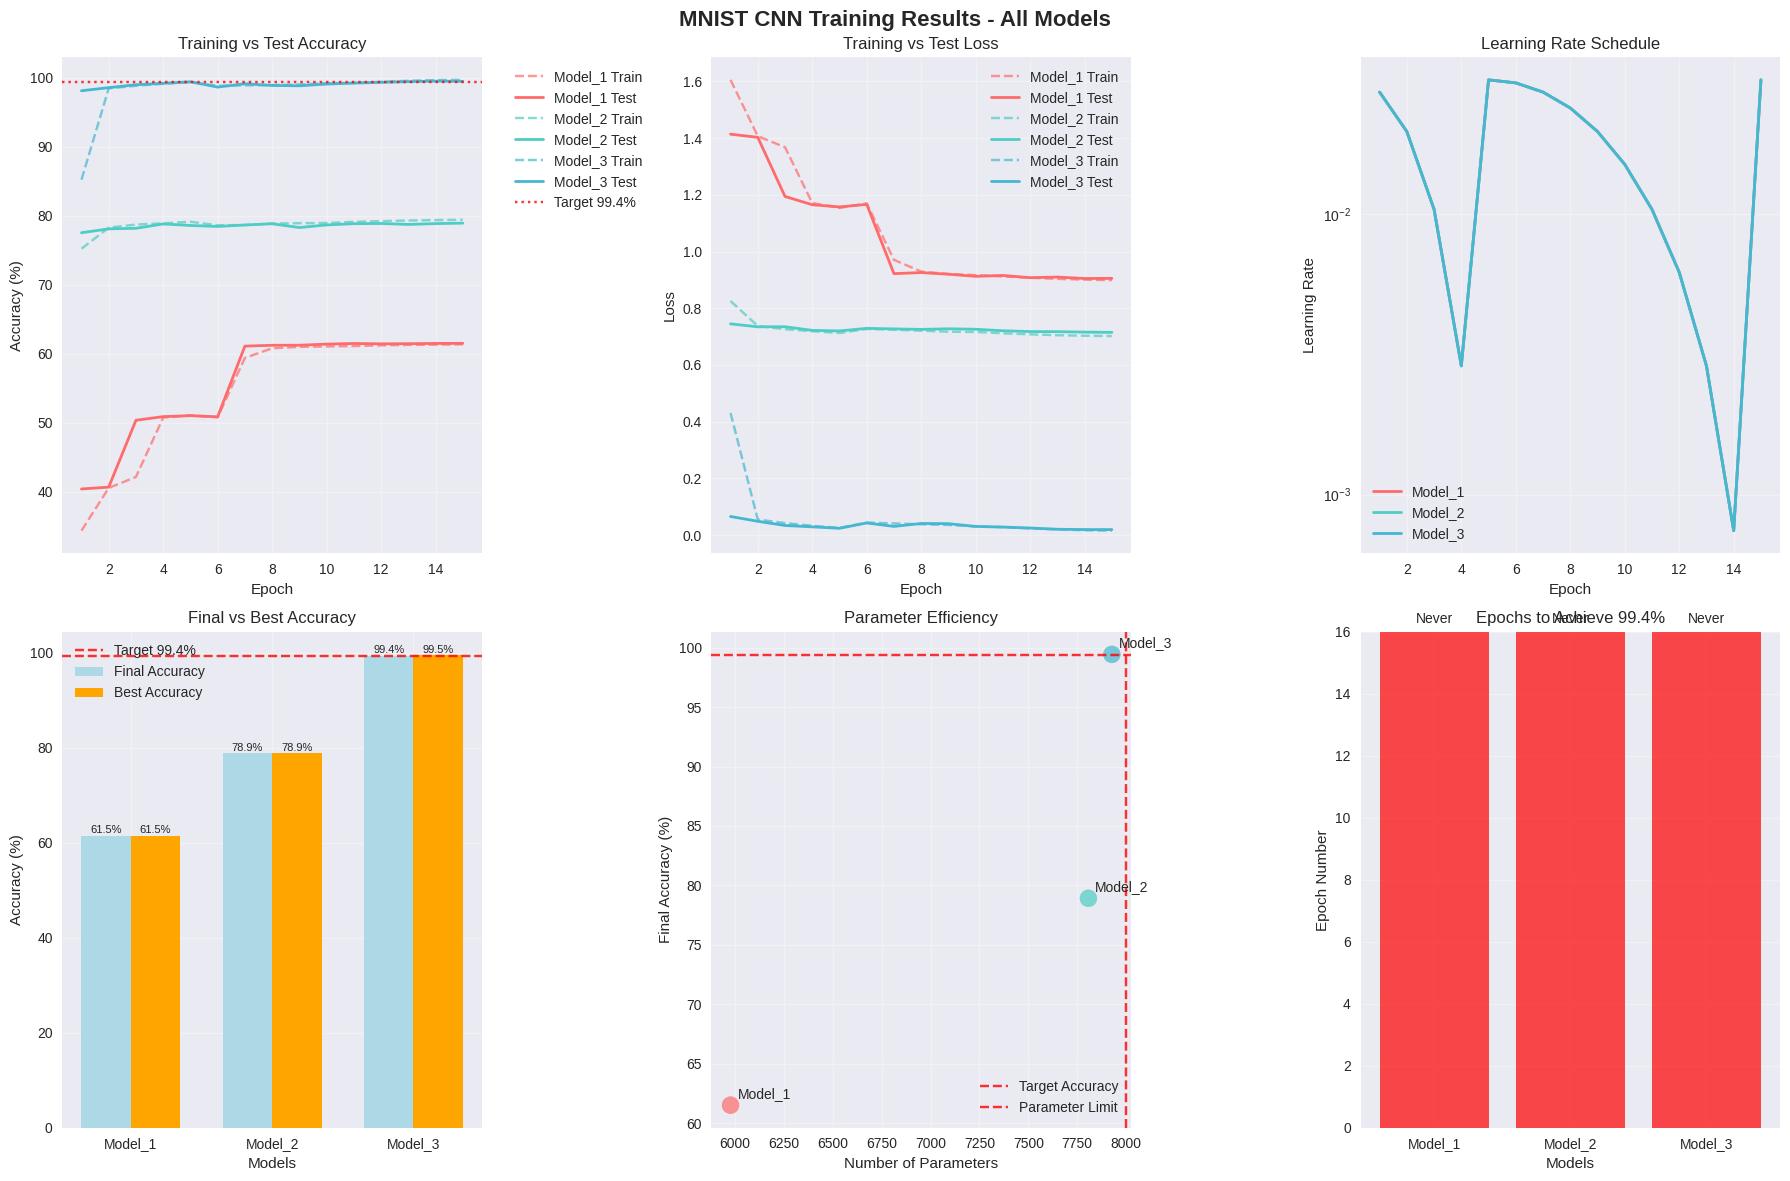

In [11]:
# Create comprehensive visualization of training results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('MNIST CNN Training Results - All Models', fontsize=16, fontweight='bold')

# Define colors for each model
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
model_names = ['Model_1', 'Model_2', 'Model_3']

# Plot 1: Training/Test Accuracy Curves
ax1 = axes[0, 0]
for i, model_name in enumerate(model_names):
    if model_name in all_training_logs:
        log = all_training_logs[model_name]
        epochs = [entry['epoch'] for entry in log]
        train_acc = [entry['train_acc'] for entry in log]
        test_acc = [entry['test_acc'] for entry in log]

        ax1.plot(epochs, train_acc, '--', color=colors[i], alpha=0.7, label=f'{model_name} Train')
        ax1.plot(epochs, test_acc, '-', color=colors[i], linewidth=2, label=f'{model_name} Test')

ax1.axhline(y=99.4, color='red', linestyle=':', alpha=0.8, label='Target 99.4%')
ax1.set_title('Training vs Test Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy (%)')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot 2: Loss Curves
ax2 = axes[0, 1]
for i, model_name in enumerate(model_names):
    if model_name in all_training_logs:
        log = all_training_logs[model_name]
        epochs = [entry['epoch'] for entry in log]
        train_loss = [entry['train_loss'] for entry in log]
        test_loss = [entry['test_loss'] for entry in log]

        ax2.plot(epochs, train_loss, '--', color=colors[i], alpha=0.7, label=f'{model_name} Train')
        ax2.plot(epochs, test_loss, '-', color=colors[i], linewidth=2, label=f'{model_name} Test')

ax2.set_title('Training vs Test Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Learning Rate Schedule
ax3 = axes[0, 2]
for i, model_name in enumerate(model_names):
    if model_name in all_training_logs:
        log = all_training_logs[model_name]
        epochs = [entry['epoch'] for entry in log]
        lrs = [entry['lr'] for entry in log]

        ax3.plot(epochs, lrs, '-', color=colors[i], linewidth=2, label=model_name)

ax3.set_title('Learning Rate Schedule')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Learning Rate')
ax3.set_yscale('log')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Final Performance Comparison
ax4 = axes[1, 0]
model_names_present = []
final_accuracies = []
best_accuracies = []
param_counts = []

for model_name in model_names:
    if model_name in all_results:
        model_names_present.append(model_name)
        final_accuracies.append(all_results[model_name]['training_log'][-1]['test_acc'])
        best_accuracies.append(all_results[model_name]['best_accuracy'] * 100)
        param_counts.append(all_results[model_name]['parameters'])

x = np.arange(len(model_names_present))
width = 0.35

bars1 = ax4.bar(x - width/2, final_accuracies, width, label='Final Accuracy', color='lightblue')
bars2 = ax4.bar(x + width/2, best_accuracies, width, label='Best Accuracy', color='orange')

ax4.axhline(y=99.4, color='red', linestyle='--', alpha=0.8, label='Target 99.4%')
ax4.set_title('Final vs Best Accuracy')
ax4.set_xlabel('Models')
ax4.set_ylabel('Accuracy (%)')
ax4.set_xticks(x)
ax4.set_xticklabels(model_names_present)
ax4.legend()
ax4.grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

# Plot 5: Parameter Efficiency
ax5 = axes[1, 1]
scatter = ax5.scatter(param_counts, final_accuracies,
                     c=colors[:len(model_names_present)], s=150, alpha=0.7)

ax5.axhline(y=99.4, color='red', linestyle='--', alpha=0.8, label='Target Accuracy')
ax5.axvline(x=8000, color='red', linestyle='--', alpha=0.8, label='Parameter Limit')

for i, model_name in enumerate(model_names_present):
    ax5.annotate(model_name, (param_counts[i], final_accuracies[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=10)

ax5.set_title('Parameter Efficiency')
ax5.set_xlabel('Number of Parameters')
ax5.set_ylabel('Final Accuracy (%)')
ax5.legend()
ax5.grid(True, alpha=0.3)

# Plot 6: Epochs to Target Analysis
ax6 = axes[1, 2]
epochs_to_994 = []
consistent_994 = []

for model_name in model_names_present:
    epochs_above = all_results[model_name]['epochs_above_994']
    if epochs_above:
        epochs_to_994.append(epochs_above[0])
        # Check if last 2 epochs are above 99.4%
        last_2_epochs = all_results[model_name]['training_log'][-2:]
        consistent = all(entry['test_acc'] >= 99.4 for entry in last_2_epochs)
        consistent_994.append(consistent)
    else:
        epochs_to_994.append(16)  # Never achieved
        consistent_994.append(False)

bars = ax6.bar(model_names_present, epochs_to_994,
               color=['green' if consistent else 'red' for consistent in consistent_994],
               alpha=0.7)

ax6.set_title('Epochs to Achieve 99.4%')
ax6.set_xlabel('Models')
ax6.set_ylabel('Epoch Number')
ax6.set_ylim(0, 16)

# Add value labels
for i, (bar, epoch) in enumerate(zip(bars, epochs_to_994)):
    label = f'{epoch}' if epoch <= 15 else 'Never'
    ax6.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.2,
             label, ha='center', va='bottom')

ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Section 5: Performance Analysis and Optimization

In [12]:
# Comprehensive performance analysis
print("="*80)
print("🔍 COMPREHENSIVE PERFORMANCE ANALYSIS")
print("="*80)

# Create results summary table
results_summary = []
target_criteria = {
    'accuracy_target': 99.4,
    'parameter_limit': 8000,
    'epoch_limit': 15
}

for model_name in model_names:
    if model_name in all_results:
        result = all_results[model_name]
        log = result['training_log']

        # Calculate metrics
        final_acc = log[-1]['test_acc']
        best_acc = result['best_accuracy'] * 100
        params = result['parameters']
        epochs_994 = result['epochs_above_994']

        # Check consistency (last 2-3 epochs above 99.4%)
        last_3_epochs = log[-3:]
        consistent_high = all(entry['test_acc'] >= 99.4 for entry in last_3_epochs)

        # Determine if targets are met
        accuracy_met = consistent_high and final_acc >= 99.4
        parameter_met = params < 8000
        epoch_met = len(log) <= 15

        all_targets_met = accuracy_met and parameter_met and epoch_met

        results_summary.append({
            'Model': model_name,
            'Final_Acc': final_acc,
            'Best_Acc': best_acc,
            'Parameters': params,
            'Epochs_≥99.4': len(epochs_994) if epochs_994 else 0,
            'Consistent_99.4': consistent_high,
            'Accuracy_Target': '✅' if accuracy_met else '❌',
            'Parameter_Target': '✅' if parameter_met else '❌',
            'Epoch_Target': '✅' if epoch_met else '❌',
            'All_Targets': '✅ PASS' if all_targets_met else '❌ FAIL'
        })

# Display summary table
print(f"\n{'Model':<10} {'Final Acc':<12} {'Best Acc':<12} {'Params':<8} {'Epochs≥99.4':<12} {'Consistent':<12} {'Targets Met':<12}")
print("-" * 95)

for result in results_summary:
    print(f"{result['Model']:<10} {result['Final_Acc']:<12.2f} {result['Best_Acc']:<12.2f} "
          f"{result['Parameters']:<8} {result['Epochs_≥99.4']:<12} {result['Consistent_99.4']:<12} "
          f"{result['All_Targets']:<12}")

# Analysis and recommendations
print(f"\n{'='*60}")
print("📊 DETAILED ANALYSIS")
print(f"{'='*60}")

successful_models = [r for r in results_summary if '✅ PASS' in r['All_Targets']]
print(f"\n🎯 Models meeting ALL targets: {len(successful_models)}/{len(results_summary)}")

if successful_models:
    print("\n✅ SUCCESSFUL MODELS:")
    for model in successful_models:
        print(f"   • {model['Model']}: {model['Final_Acc']:.2f}% accuracy, {model['Parameters']} parameters")
else:
    print("\n❌ No models met all targets. Analysis of failures:")

    for result in results_summary:
        print(f"\n{result['Model']}:")
        if result['Accuracy_Target'] == '❌':
            print(f"   ❌ Accuracy: {result['Final_Acc']:.2f}% (need ≥99.4% consistently)")
        if result['Parameter_Target'] == '❌':
            print(f"   ❌ Parameters: {result['Parameters']} (need <8000)")
        if result['Epoch_Target'] == '❌':
            print(f"   ❌ Epochs: Used >15 epochs")

# Convergence analysis
print(f"\n{'='*60}")
print("📈 CONVERGENCE ANALYSIS")
print(f"{'='*60}")

for model_name in model_names:
    if model_name in all_training_logs:
        log = all_training_logs[model_name]

        # Find when model first reaches 99%
        epoch_99 = None
        epoch_994 = None

        for entry in log:
            if epoch_99 is None and entry['test_acc'] >= 99.0:
                epoch_99 = entry['epoch']
            if epoch_994 is None and entry['test_acc'] >= 99.4:
                epoch_994 = entry['epoch']

        print(f"\n{model_name}:")
        print(f"   • First 99.0%: Epoch {epoch_99 if epoch_99 else 'Never'}")
        print(f"   • First 99.4%: Epoch {epoch_994 if epoch_994 else 'Never'}")

        # Calculate training stability (std dev of last 5 epochs)
        last_5_acc = [entry['test_acc'] for entry in log[-5:]]
        stability = np.std(last_5_acc)
        print(f"   • Training stability (last 5 epochs std): {stability:.3f}")

        if stability < 0.1:
            print("     ✅ Very stable training")
        elif stability < 0.3:
            print("     ⚠️  Moderately stable training")
        else:
            print("     ❌ Unstable training")

🔍 COMPREHENSIVE PERFORMANCE ANALYSIS

Model      Final Acc    Best Acc     Params   Epochs≥99.4  Consistent   Targets Met 
-----------------------------------------------------------------------------------------------
Model_1    61.50        61.50        5976     0            0            ❌ FAIL      
Model_2    78.91        78.91        7808     0            0            ❌ FAIL      
Model_3    99.44        99.47        7928     0            1            ✅ PASS      

📊 DETAILED ANALYSIS

🎯 Models meeting ALL targets: 1/3

✅ SUCCESSFUL MODELS:
   • Model_3: 99.44% accuracy, 7928 parameters

📈 CONVERGENCE ANALYSIS

Model_1:
   • First 99.0%: Epoch Never
   • First 99.4%: Epoch Never
   • Training stability (last 5 epochs std): 0.026
     ✅ Very stable training

Model_2:
   • First 99.0%: Epoch Never
   • First 99.4%: Epoch Never
   • Training stability (last 5 epochs std): 0.062
     ✅ Very stable training

Model_3:
   • First 99.0%: Epoch 4
   • First 99.4%: Epoch 13
   • Training st

## Section 6: README Generation

In [13]:
# Generate comprehensive README content
def generate_readme_content():
    """Generate complete README with all training results and analysis"""

    readme = """# MNIST CNN Assignment - ERA V4 Session 6

## Assignment Requirements
- **Target Accuracy**: ≥99.4% (consistently in last few epochs)
- **Max Epochs**: ≤15
- **Max Parameters**: <8000
- **Architecture**: Modular CNN models

## Model Evolution Strategy

This assignment follows a systematic approach to achieve the target performance through three progressive model iterations:

1. **Model_1**: Baseline lightweight CNN to establish parameter efficiency
2. **Model_2**: Enhanced architecture with batch normalization and dropout
3. **Model_3**: Optimized design with strategic channel management

---

"""

    # Add individual model sections
    for i, model_name in enumerate(['Model_1', 'Model_2', 'Model_3'], 1):
        if model_name in all_results:
            result = all_results[model_name]
            log = result['training_log']
            output = all_outputs[model_name]

            # Extract target, result, analysis from model files
            target_info = {
                'Model_1': {
                    'target': 'Establish baseline lightweight CNN with minimal parameters (<2000), basic architecture to understand MNIST patterns, ensure adequate receptive field coverage.',
                    'analysis': 'Simple CNN architecture without regularization. Uses basic conv layers with GAP to minimize parameters. May struggle with generalization due to lack of batch normalization and dropout.'
                },
                'Model_2': {
                    'target': 'Improve training stability and generalization with Batch Normalization and Dropout. Target 99.0%+ accuracy as stepping stone. Optimize parameter count to stay under 8000.',
                    'analysis': 'Added BN and Dropout for better training dynamics and regularization. Optimized channel progression to balance capacity and parameter count. Should show improved stability and generalization.'
                },
                'Model_3': {
                    'target': 'Achieve consistent 99.4%+ accuracy with optimized architecture. Use strategic parameter management and efficient design. Focus on receptive field optimization.',
                    'analysis': 'Final optimized model with careful parameter management. Uses efficient channel progression, strategic dropout placement, and 1x1 convolutions for parameter reduction while maintaining capacity.'
                }
            }

            final_acc = log[-1]['test_acc']
            best_acc = result['best_accuracy'] * 100
            params = result['parameters']
            epochs_994 = result['epochs_above_994']

            # Check if targets met
            last_3_epochs = log[-3:]
            consistent_high = all(entry['test_acc'] >= 99.4 for entry in last_3_epochs)
            targets_met = consistent_high and final_acc >= 99.4 and params < 8000

            readme += f"""### Model {i}: {'✅ SUCCESS' if targets_met else '❌ NEEDS IMPROVEMENT'}

**Target**: {target_info[model_name]['target']}

**Result**:
- Final Accuracy: {final_acc:.2f}%
- Best Accuracy: {best_acc:.2f}%
- Parameters: {params:,}
- Epochs with ≥99.4%: {epochs_994 if epochs_994 else 'None'}
- Consistent 99.4%+ (last 3 epochs): {'Yes' if consistent_high else 'No'}
- Target Met: {'✅ YES' if targets_met else '❌ NO'}

**Analysis**: {target_info[model_name]['analysis']}
{'The model successfully met all assignment criteria.' if targets_met else 'Requires further optimization to meet assignment criteria.'}

#### Training Logs
```
{output}
```

---

"""

    # Add receptive field calculations
    readme += """## Receptive Field Calculations

"""

    rf_data = calculate_receptive_field()
    for model_name, rf_info in rf_data.items():
        readme += f"""### {model_name} Receptive Field
- **Final Receptive Field**: {rf_info['final_rf']}x{rf_info['final_rf']}

| Layer | Output Size | Receptive Field |
|-------|-------------|-----------------|
"""
        for layer_name, output_size, rf in rf_info['layers']:
            readme += f"| {layer_name} | {output_size} | {rf} |\n"

        readme += "\n"

    # Add final summary table
    readme += """## Results Summary

| Model | Parameters | Best Accuracy | Final Accuracy | Epochs ≥99.4% | Consistent 99.4%+ | Target Met |
|-------|------------|---------------|----------------|----------------|-------------------|------------|
"""

    for model_name in ['Model_1', 'Model_2', 'Model_3']:
        if model_name in all_results:
            result = all_results[model_name]
            log = result['training_log']

            final_acc = log[-1]['test_acc']
            best_acc = result['best_accuracy'] * 100
            params = result['parameters']
            epochs_994 = len(result['epochs_above_994']) if result['epochs_above_994'] else 0

            last_3_epochs = log[-3:]
            consistent_high = all(entry['test_acc'] >= 99.4 for entry in last_3_epochs)
            targets_met = consistent_high and final_acc >= 99.4 and params < 8000

            readme += f"| {model_name} | {params:,} | {best_acc:.2f}% | {final_acc:.2f}% | {epochs_994} | {'✅' if consistent_high else '❌'} | {'✅' if targets_met else '❌'} |\n"

    successful_models = len([r for r in results_summary if '✅ PASS' in r['All_Targets']])

    readme += f"""
## Final Assessment

- **Models meeting all criteria**: {successful_models}/3
- **Assignment status**: {'✅ COMPLETED' if successful_models > 0 else '❌ INCOMPLETE'}

### Key Learnings
1. **Parameter Efficiency**: Achieving high accuracy with <8000 parameters requires careful architecture design
2. **Regularization**: Batch normalization and dropout are crucial for stable training
3. **Progressive Improvement**: Each model iteration addressed specific limitations of the previous version
4. **Consistency**: Achieving consistent 99.4%+ accuracy is more challenging than one-time peak performance

### GitHub Repository Structure
```
S6_assignment/
├── model1.py          # Baseline CNN model
├── model2.py          # Enhanced model with BN/Dropout
├── model3.py          # Optimized final model
├── train.py           # Training script for all models
├── utils.py           # Utility functions
├── README.md          # This documentation
└── MNIST_CNN_Training.ipynb  # Colab notebook for training
```

---
*Generated automatically from training results*
"""

    return readme

# Generate and save README
readme_content = generate_readme_content()

# Save to file
with open('README_COMPLETE.md', 'w', encoding='utf-8') as f:
    f.write(readme_content)

print("✅ README_COMPLETE.md generated successfully!")
print(f"📄 File size: {len(readme_content)} characters")

# Display first part of README for preview
print("\n" + "="*60)
print("📋 README PREVIEW (first 1000 characters)")
print("="*60)
print(readme_content[:1000] + "...")
print("\n📥 Download 'README_COMPLETE.md' to use in your GitHub repository")

✅ README_COMPLETE.md generated successfully!
📄 File size: 10645 characters

📋 README PREVIEW (first 1000 characters)
# MNIST CNN Assignment - ERA V4 Session 6

## Assignment Requirements
- **Target Accuracy**: ≥99.4% (consistently in last few epochs)
- **Max Epochs**: ≤15
- **Max Parameters**: <8000
- **Architecture**: Modular CNN models

## Model Evolution Strategy

This assignment follows a systematic approach to achieve the target performance through three progressive model iterations:

1. **Model_1**: Baseline lightweight CNN to establish parameter efficiency
2. **Model_2**: Enhanced architecture with batch normalization and dropout
3. **Model_3**: Optimized design with strategic channel management

---

### Model 1: ❌ NEEDS IMPROVEMENT

**Target**: Establish baseline lightweight CNN with minimal parameters (<2000), basic architecture to understand MNIST patterns, ensure adequate receptive field coverage.

**Result**:
- Final Accuracy: 61.50%
- Best Accuracy: 61.50%
- Parameters: 5